In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
sales = pd.read_csv('Sales_Data.csv', parse_dates=['transaction timestamp'])

sales.rename(index=str, columns={'transaction id': 'transID',
                              'product id' : 'prdtID',
                              'product description' : 'description',
                              'quantity sold' : 'quantity',
                              'transaction timestamp' : 'timestamp',
                              'day_name' : 'day',
                              'day_of_month' : 'day_num',
                              'month_of_year' : 'month',
                              'time_of_day(hh:mm:ss)' : 'time',
                              'unit price' : 'price',
                              'customer id' : 'custID',
                              'transaction country' : 'country'}, inplace=True)

columns = ['transID', 'custID', 'prdtID', 'description', 'quantity', 'price', 'country', 'timestamp', 'date', 'day', 'day_num', 'month', 'time']

# convert to lower case
sales['description'] = sales['description'].str.lower()
# remove trailing white spaces
sales['description'] = sales['description'].str.strip()

sales = sales.drop_duplicates()

sales['total_price'] = sales['quantity'] * sales['price']

In [3]:
sales.head()

,transID,prdtID,description,quantity,timestamp,price,custID,country,date,day,day_num,month,time,total_price
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,Wednesday,1,December,08:26:00,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,Wednesday,1,December,08:26:00,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,Wednesday,1,December,08:26:00,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,Wednesday,1,December,08:26:00,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,Wednesday,1,December,08:26:00,20.34


In [4]:
sales['cancelled'] = sales['transID'].str[0]

sales['cancelled'].value_counts()

5    527387
C      9251
A         3
Name: cancelled, dtype: int64

In [5]:
sales[sales['cancelled']=='C'].describe()

,quantity,price,custID,day_num,total_price
count,9251.000000,9251.000000,8872.000000,9251.000000,9251.000000
mean,-29.787050,48.570430,14990.152953,14.901200,-96.636010
std,1147.997592,667.926393,1708.230387,8.612647,2043.923629
min,-80995.000000,0.010000,12346.000000,1.000000,-168469.600000
25%,-6.000000,1.450000,13505.000000,7.000000,-17.700000
50%,-2.000000,2.950000,14868.000000,14.000000,-8.500000
75%,-1.000000,5.950000,16393.000000,22.000000,-3.700000
max,-1.000000,38970.000000,18282.000000,31.000000,-0.120000


In [6]:
n1 = len(sales[sales['cancelled']=='C'])
n2 = sales.shape[0]
print('Percentage of orders callenced:', round(n1/n2*100,2))

Percentage of orders callenced: 1.72


In [7]:
n1 = abs(sales[sales['cancelled']=='C'].total_price.sum())

In [8]:
n2 = sales[sales['cancelled']!='C'].total_price.sum()

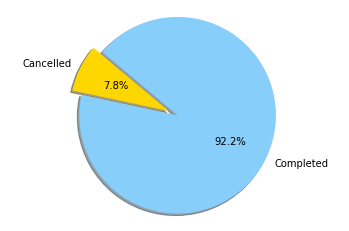

In [29]:
labels = 'Cancelled','Completed'
sizes = [n1,n2]
colors = ['gold','lightskyblue']
explode = (0.1,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [9]:
print('Percentage of revenue cancelled:', (n1/(n1+n2)*100))

Percentage of revenue cancelled: 7.764307258296299


In [32]:
n1 = sales[sales['country']=='United Kingdom'].total_price.sum()
n2 = sales[sales['country']!='United Kingdom'].total_price.sum()

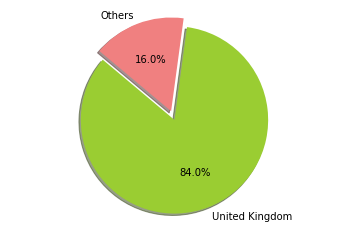

In [34]:
labels = 'United Kingdom','Others'
sizes = [n1,n2]
colors = ['yellowgreen','lightcoral']
explode = (0,0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [10]:
cancelled = sales[sales['cancelled']=='C']

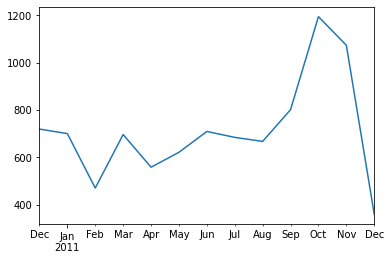

In [11]:
cancelled['timestamp'].value_counts().resample('M').sum().plot.line()

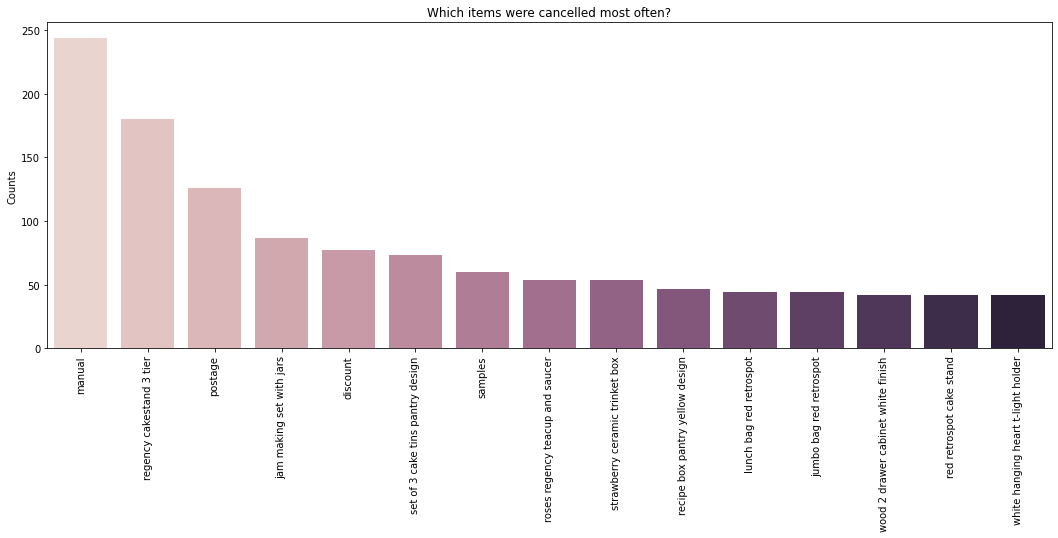

In [12]:
# which items were cancelled most often?

item_counts = cancelled['description'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(item_counts.index, item_counts.values, palette=sns.cubehelix_palette(15))
plt.ylabel("Counts")
plt.title("Which items were cancelled most often?");
plt.xticks(rotation=90);

In [13]:
cancelled = cancelled[cancelled['description'] != 'discount']
cancelled = cancelled[cancelled['description'] != 'samples']
cancelled = cancelled[cancelled['description'] != 'manual']

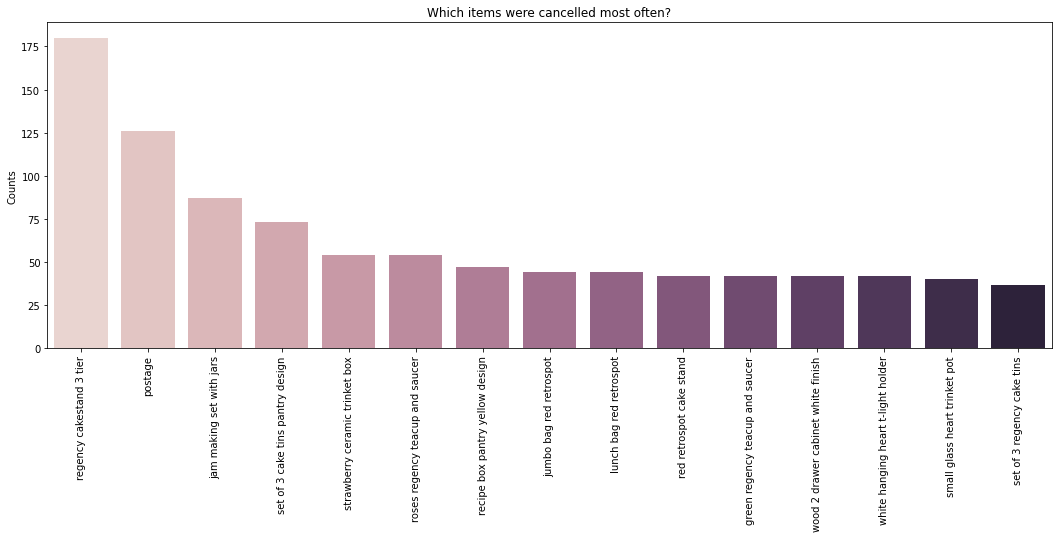

In [14]:
# which items were cancelled most often?

item_counts = cancelled['description'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(item_counts.index, item_counts.values, palette=sns.cubehelix_palette(15))
plt.ylabel("Counts")
plt.title("Which items were cancelled most often?");
plt.xticks(rotation=90);

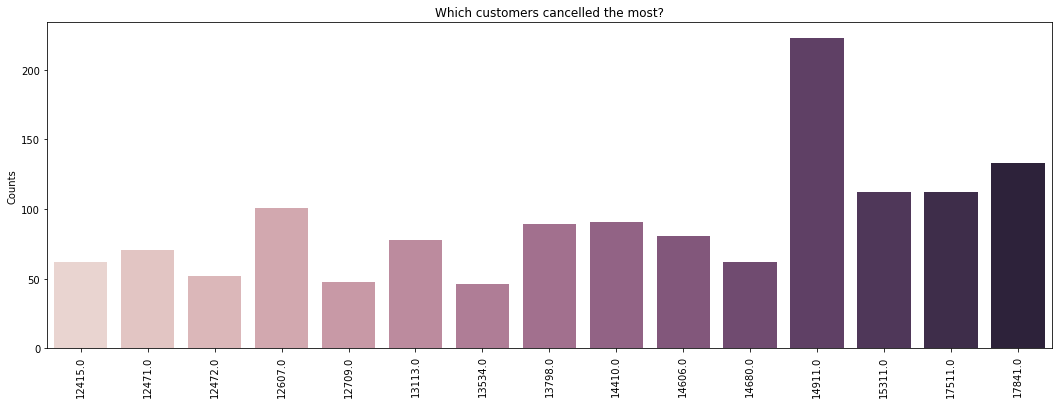

In [41]:
# which customers cancelled the most 
item_counts = cancelled['custID'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(item_counts.index, item_counts.values, palette=sns.cubehelix_palette(15))
plt.ylabel("Counts")
plt.title("Which customers cancelled the most?");
plt.xticks(rotation=90);

In [42]:
item_counts

14911.0    223
17841.0    133
17511.0    112
15311.0    112
12607.0    101
14410.0     91
13798.0     89
14606.0     81
13113.0     78
12471.0     71
12415.0     62
14680.0     62
12472.0     52
12709.0     48
13534.0     46
Name: custID, dtype: int64

In [52]:
cust = sales[sales['custID']==17841.0]
print(cust.head())
print(cust.shape)
cust = cust[cust['quantity']>0]
cust.describe()

      transID  prdtID                   description  quantity  \
1441  C536543   22632     hand warmer red retrospot        -1   
1442  C536543   22355     charlotte bag suki design        -2   
2037   536557   21495    skulls and crossbones wrap        25   
2038   536557  46000R  polyester filler pad 45x30cm         2   
2039   536557  46000S  polyester filler pad 40x40cm         1   

               timestamp  price   custID         country        date  \
1441 2010-12-01 14:30:00   2.10  17841.0  United Kingdom  2010-12-01   
1442 2010-12-01 14:30:00   0.85  17841.0  United Kingdom  2010-12-01   
2037 2010-12-01 14:41:00   0.42  17841.0  United Kingdom  2010-12-01   
2038 2010-12-01 14:41:00   1.45  17841.0  United Kingdom  2010-12-01   
2039 2010-12-01 14:41:00   1.45  17841.0  United Kingdom  2010-12-01   

            day  day_num     month      time  total_price cancelled  
1441  Wednesday        1  December  14:30:00        -2.10         C  
1442  Wednesday        1  December  

,quantity,price,custID,day_num,total_price
count,7676.000000,7676.000000,7676.0,7676.000000,7676.000000
mean,2.974726,2.536696,17841.0,15.302892,5.278770
std,6.794931,2.954772,0.0,8.926765,10.036611
min,1.000000,0.040000,17841.0,1.000000,0.290000
25%,1.000000,1.250000,17841.0,8.000000,1.650000
50%,1.000000,1.650000,17841.0,14.000000,2.950000
75%,3.000000,2.950000,17841.0,23.000000,5.900000
max,288.000000,39.950000,17841.0,31.000000,349.500000


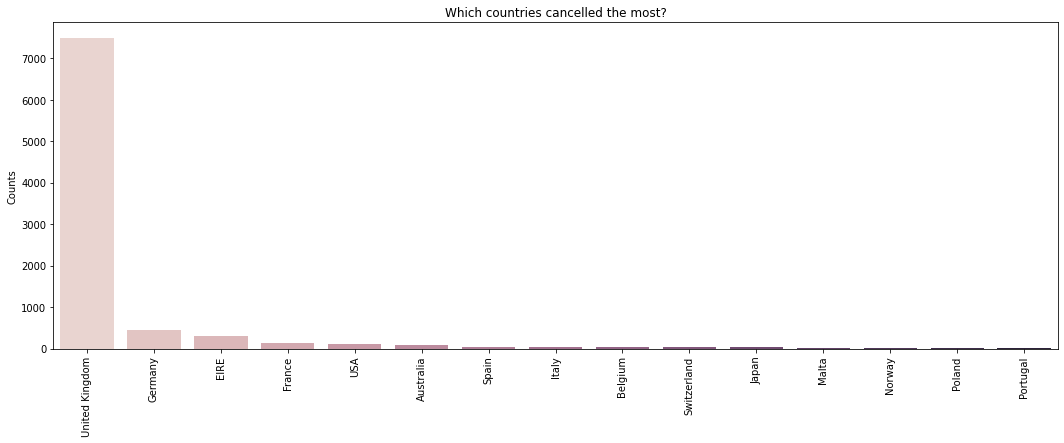

In [16]:
# which countries cancelled the most

item_counts = cancelled['country'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(item_counts.index, item_counts.values, palette=sns.cubehelix_palette(15))
plt.ylabel("Counts")
plt.title("Which countries cancelled the most?");
plt.xticks(rotation=90);

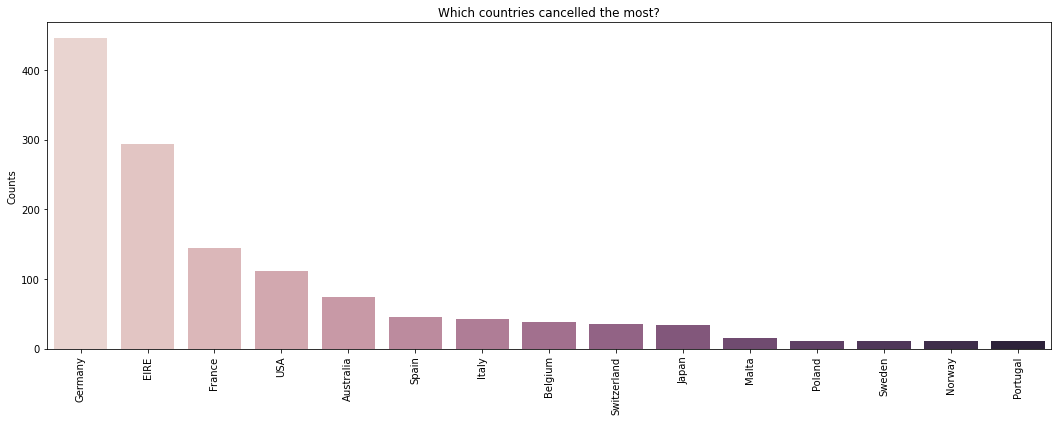

In [17]:
# which countries cancelled the most except UK
cancelled2 = cancelled[cancelled['country']!='United Kingdom']

item_counts = cancelled2['country'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(item_counts.index, item_counts.values, palette=sns.cubehelix_palette(15))
plt.ylabel("Counts")
plt.title("Which countries cancelled the most?");
plt.xticks(rotation=90);

In [18]:
cancelled['UK'] = cancelled['country']
to_replace = list(cancelled['UK'].unique())
to_replace.remove('United Kingdom')
cancelled.replace(to_replace, 'Other', inplace=True)
cancelled['UK'].value_counts(normalize=True)*100

United Kingdom    84.453213
Other             15.546787
Name: UK, dtype: float64

In [19]:
#plt.figure(figsize=(15,8))
#sns.distplot(cancelled['price'])

In [20]:
item_counts = cancelled['description'].value_counts().sort_values(ascending=False).iloc[0:15]

In [21]:
item_counts.max()

180

In [22]:
prdtwise = cancelled.description.value_counts().reset_index(name='counts')[0:15]

In [23]:
prdtwise

,index,counts
0,regency cakestand 3 tier,180
1,postage,126
2,jam making set with jars,87
3,set of 3 cake tins pantry design,73
4,strawberry ceramic trinket box,54
5,roses regency teacup and saucer,54
6,recipe box pantry yellow design,47
7,jumbo bag red retrospot,44
8,lunch bag red retrospot,44
9,green regency teacup and saucer,42


In [24]:
## Re-check Here
'''
print(prdtwise['index'].value_counts()/prdtwise['index'].count()*100)

plt.figure(figsize=(15,8))
sns.countplot(prdtwise['index'], hue=prdtwise['UK'])
'''

"\nprint(prdtwise['index'].value_counts()/prdtwise['index'].count()*100)\n\nplt.figure(figsize=(15,8))\nsns.countplot(prdtwise['index'], hue=prdtwise['UK'])\n"

In [25]:
free = sales[sales.price == 0]

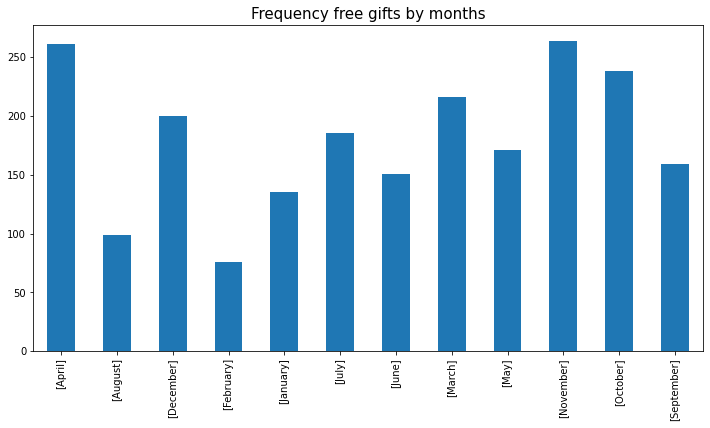

In [26]:
plt.figure(figsize=(12,6))
plt.title("Frequency free gifts by months", fontsize=15)
transaction_date = free.groupby(['transID'])['month'].unique()
transaction_date.value_counts().sort_index().plot.bar()

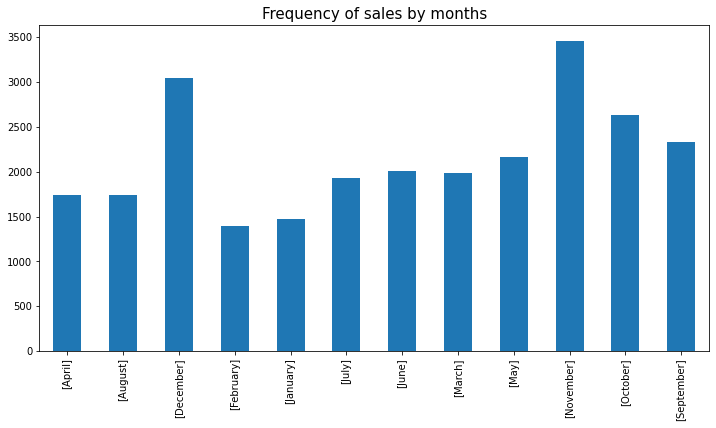

In [40]:
plt.figure(figsize=(12,6))
plt.title("Frequency of sales by months", fontsize=15)
transaction_date = sales.groupby(['transID'])['month'].unique()
transaction_date.value_counts().sort_index().plot.bar()

In [28]:
free.shape[0]

2510